In [316]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(color_codes=True)

import py_auc

In [317]:
data_fname = 'Sim_summary_data_v3.csv'
summary = pd.read_csv(data_fname, index_col=0)
summary['sampling_ratio'] = summary['sampling_size']/summary['n']

In [318]:
s_done = summary[summary['done'] == 1]
s_done

,n,n1,shape1,mu1,std1,n0,shape0,mu0,std0,rho,...,sampling_size,sampling_repeats,sampling_ratio,auc_delta_sample,auc_bac_sample,auc_bac_sample_time,aupr_pre_sample,aupr_pre_sample_time,repeat#,done
0,1000,250,gaussian,1.0,2.0,750,gaussian,0.0,2.0,0.25,...,100,100,0.1,0.658245,0.658245,0.435512,0.394722,0.0,0.0,1
1,1000,250,gaussian,1.0,2.0,750,gaussian,0.0,2.0,0.25,...,100,100,0.1,0.664869,0.664869,0.421173,0.400220,0.0,1.0,1
2,1000,250,gaussian,1.0,2.0,750,gaussian,0.0,2.0,0.25,...,100,100,0.1,0.664576,0.664576,0.413148,0.400503,0.0,2.0,1
3,1000,250,gaussian,1.0,2.0,750,gaussian,0.0,2.0,0.25,...,100,100,0.1,0.661291,0.661291,0.410774,0.397923,0.0,3.0,1
4,1000,250,gaussian,1.0,2.0,750,gaussian,0.0,2.0,0.25,...,100,100,0.1,0.668736,0.668736,0.410313,0.396349,0.0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,1000000,750000,gaussian,5.0,2.0,250000,gaussian,0.0,2.0,0.75,...,700000,500,0.7,0.961717,0.961717,104.769437,0.986105,0.0,0.0,1
2021,1000000,750000,gaussian,5.0,2.0,250000,gaussian,0.0,2.0,0.75,...,700000,500,0.7,0.961712,0.961712,111.346314,0.986103,0.0,1.0,1
2022,1000000,750000,gaussian,5.0,2.0,250000,gaussian,0.0,2.0,0.75,...,700000,500,0.7,0.961702,0.961702,103.321796,0.986099,0.0,2.0,1
2023,1000000,750000,gaussian,5.0,2.0,250000,gaussian,0.0,2.0,0.75,...,700000,500,0.7,0.961721,0.961721,106.190007,0.986107,0.0,3.0,1


In [319]:
s_done.columns

Index(['n', 'n1', 'shape1', 'mu1', 'std1', 'n0', 'shape0', 'mu0', 'std0',
       'rho', 'auc_delta', 'auc_delta_time', 'auc_bac', 'auc_bac_time',
       'auc_sk', 'auc_sk_time', 'aupr_pre', 'aupr_pre_time', 'aupr_sk',
       'aupr_sk_time', 'sampling_size', 'sampling_repeats', 'sampling_ratio',
       'auc_delta_sample', 'auc_bac_sample', 'auc_bac_sample_time',
       'aupr_pre_sample', 'aupr_pre_sample_time', 'repeat#', 'done'],
      dtype='object')

In [320]:
s_done.nunique()

n                          3
n1                         9
shape1                     1
mu1                        3
std1                       1
n0                         9
shape0                     1
mu0                        1
std0                       1
rho                        3
auc_delta                 27
auc_delta_time            27
auc_bac                   27
auc_bac_time              27
auc_sk                    27
auc_sk_time               27
aupr_pre                  27
aupr_pre_time             27
aupr_sk                   27
aupr_sk_time              27
sampling_size             15
sampling_repeats           3
sampling_ratio             5
auc_delta_sample        2023
auc_bac_sample          2024
auc_bac_sample_time     2025
aupr_pre_sample         2025
aupr_pre_sample_time       1
repeat#                    5
done                       1
dtype: int64

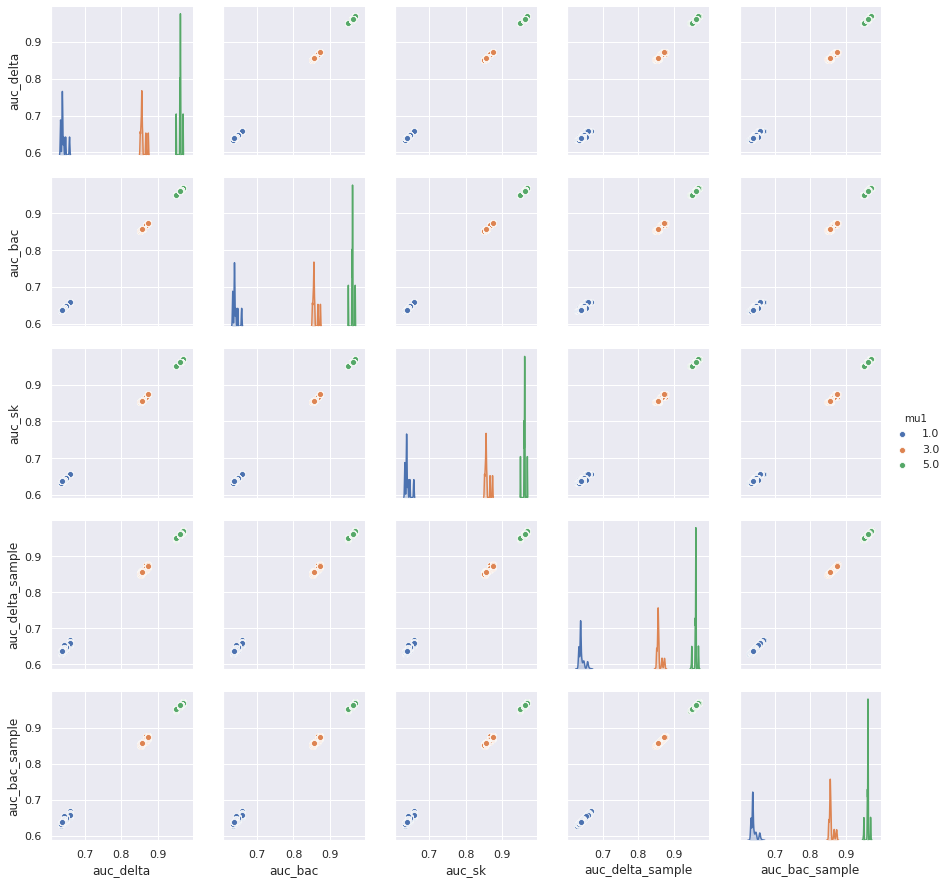

In [321]:
sns.pairplot(s_done, vars=['auc_delta', 'auc_bac', 'auc_sk', 'auc_delta_sample', 'auc_bac_sample'], hue='mu1')

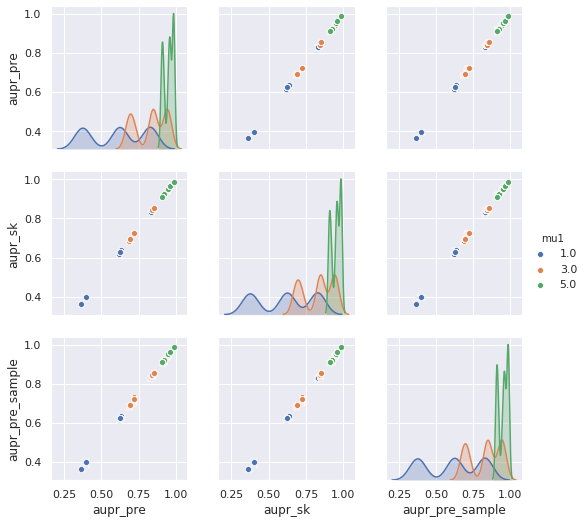

In [322]:
sns.pairplot(s_done, vars=['aupr_pre', 'aupr_sk', 'aupr_pre_sample'], hue='mu1')

In [250]:
data = s_done.query('mu1 == 5 & n == 10000')

sdata = data.groupby(['sampling_ratio', 'sampling_repeats']).mean()
std_data = data.groupby(['sampling_ratio', 'sampling_repeats']).std()
x = sdata['auc_delta_sample'].unstack(level=1).loc[:, 100]
data['sampling_repeats'].unique()


array([100, 300, 500])

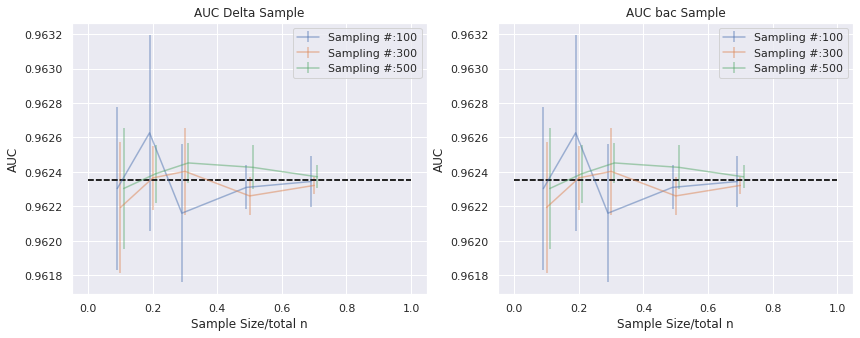

In [224]:
# sampling check
def plot_sampling(s_done):
    data = s_done.query('mu1 == 5 & n == 10000 & rho == 0.5')
    g_data_mean = data.groupby(['sampling_ratio', 'sampling_repeats']).mean()
    g_data_std = data.groupby(['sampling_ratio', 'sampling_repeats']).std()
    jitter = [-0.01, 0, 0.01]
    sampling_repeats = [100, 300, 500]

    fig = plt.figure(figsize=(14,5))
    auc_delta_mean = g_data_mean['auc_delta'].unstack(level=1).mean()
    auc_sk_mean = g_data_mean['auc_sk'].unstack(level=1).mean()

    ax = fig.add_subplot(121)
    for i in range(3):
        x = g_data_mean['auc_delta_sample'].unstack(level=1).loc[:, sampling_repeats[i]]
        y = g_data_std['auc_delta_sample'].unstack(level=1).loc[:, sampling_repeats[i]]
        ax.errorbar(x.index.values + jitter[i], x.values, yerr=y.values, label='Sampling #:{}'.format(sampling_repeats[i]), alpha=0.5)
    ax.hlines(auc_delta_mean, 0, 1.0, linestyle='dashed', alpha=0.5)
    ax.hlines(auc_sk_mean, 0, 1.0, linestyle='dashed', alpha=0.5)
    ax.set_xlabel('Sample Size/total n')
    ax.set_ylabel('AUC')
    ax.set_title('AUC Delta Sample')
    ax.legend()

    ax = fig.add_subplot(122)
    for i in range(3):
        x = g_data_mean['auc_bac_sample'].unstack(level=1).loc[:, sampling_repeats[i]]
        y = g_data_std['auc_bac_sample'].unstack(level=1).loc[:, sampling_repeats[i]]
        ax.errorbar(x.index.values + jitter[i], x.values, yerr=y.values, label='Sampling #:{}'.format(sampling_repeats[i]), alpha=0.5)
    ax.hlines(auc_delta_mean, 0, 1.0, linestyle='dashed', alpha=0.5)
    ax.hlines(auc_sk_mean, 0, 1.0, linestyle='dashed', alpha=0.5)
    ax.set_xlabel('Sample Size/total n')
    ax.set_ylabel('AUC')
    ax.set_title('AUC bac Sample')
    ax.legend()
    
plot_sampling(s_done)

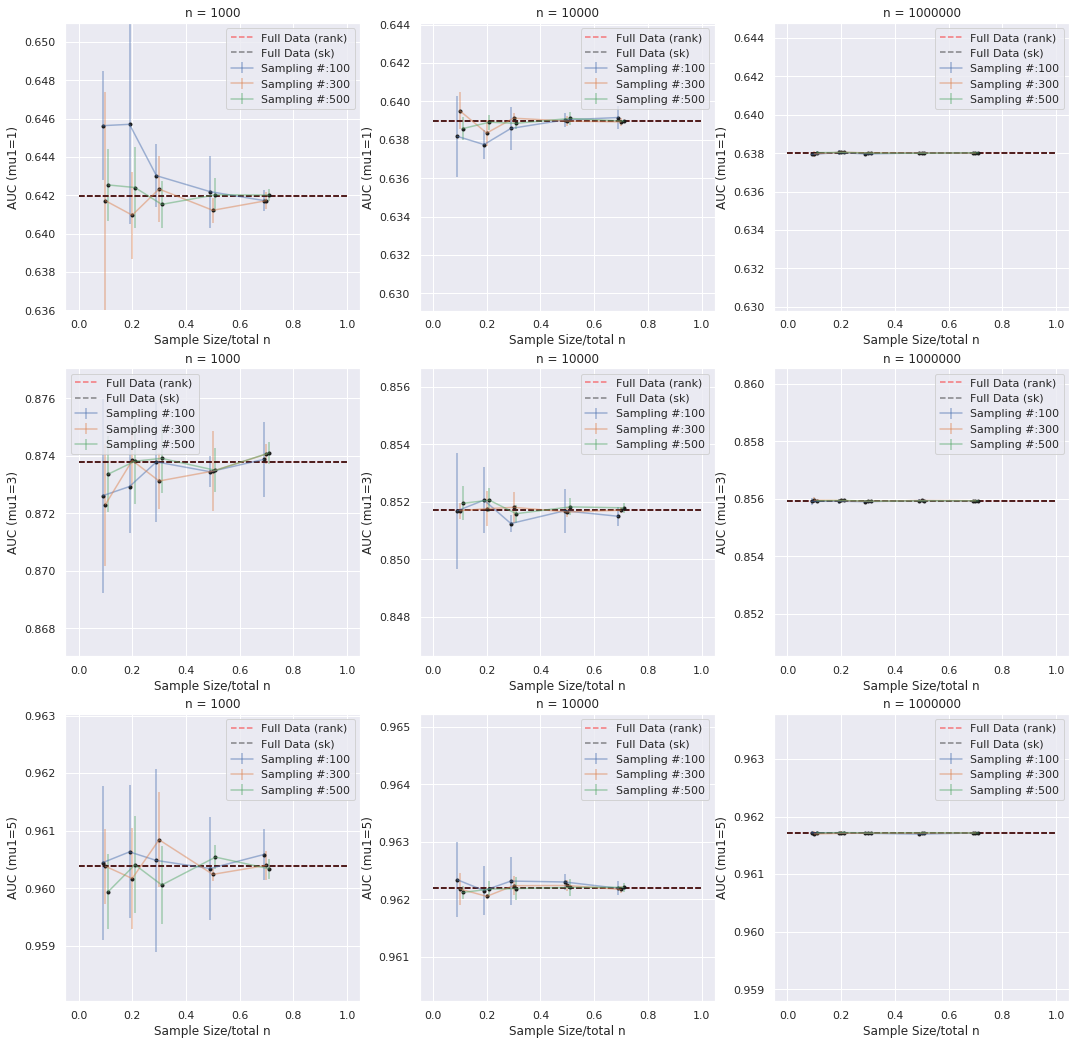

In [327]:
# sampling check
def plot_sampling(s_done, rho=0.5):
    jitter = [-0.01, 0, 0.01]
    sampling_repeats = [100, 300, 500]
    
    fig = plt.figure(figsize=(18,18))
    
    def plot_one(mu1=1, n=1000, rho=0.25, ax=ax, yspan=None):
        data = s_done.query('mu1 == {} & n == {} & rho == {}'.format(mu1, n, rho))
        g_data_mean = data.groupby(['sampling_ratio', 'sampling_repeats']).mean()
        g_data_std = data.groupby(['sampling_ratio', 'sampling_repeats']).std()
        #if len(data['sampling_repeats'].unique()) < 3: return

        auc_delta_mean = g_data_mean['auc_delta'].unstack(level=1).mean().values
        auc_sk_mean = g_data_mean['auc_sk'].unstack(level=1).mean().values
        
        ymin, ymax = 1, 0
        check = True
        for i in range(3):
            if sampling_repeats[i] not in data['sampling_repeats'].unique(): 
                check = False
                continue
            x = g_data_mean['auc_bac_sample'].unstack(level=1).loc[:, sampling_repeats[i]]
            y = g_data_std['auc_bac_sample'].unstack(level=1).loc[:, sampling_repeats[i]]
            ax.errorbar(x.index.values + jitter[i], x.values, yerr=y.values, label='Sampling #:{}'.format(sampling_repeats[i]), alpha=0.5)
            ax.plot(x.index.values+jitter[i], x.values, 'k.')
            ymin = ymin if ymin < (x.values-y.values).min() else (x.values-y.values).min()
            ymax = ymax if ymax > (x.values+y.values).max() else (x.values+y.values).max()
        ax.hlines(auc_delta_mean, 0, 1.0, linestyle='dashed', color='red', alpha=0.5, label='Full Data (rank)')
        ax.hlines(auc_sk_mean, 0, 1.0, linestyle='dashed', alpha=0.5, label='Full Data (sk)')
        ax.set_xlabel('Sample Size/total n')
        ax.set_ylabel('AUC (mu1={})'.format(mu1))
        ax.set_title('n = {}'.format(n))
        if (yspan is not None) and check:
            alpha = (auc_sk_mean.mean() - ymin)/(ymax-ymin)
            #print(alpha, auc_sk_mean.mean(), ymin, ymax)
            ax.set_ylim(auc_sk_mean.mean() - alpha*yspan, auc_sk_mean.mean() + (1-alpha)*yspan)
        check = True
            
        ax.legend()

    ax1 = fig.add_subplot(331)
    plot_one(mu1=1, n=1000, rho=rho, ax=ax1, yspan=0.015)
    ax2 = fig.add_subplot(332) 
    plot_one(mu1=1, n=10000, rho=rho, ax=ax2, yspan=0.015)
    ax3 = fig.add_subplot(333)    
    plot_one(mu1=1, n=1000000, rho=rho, ax=ax3, yspan=0.015)
    ax1 = fig.add_subplot(334)
    plot_one(mu1=3, n=1000, rho=rho, ax=ax1, yspan=0.01)
    ax2 = fig.add_subplot(335) 
    plot_one(mu1=3, n=10000, rho=rho, ax=ax2, yspan=0.01)
    ax3 = fig.add_subplot(336)    
    plot_one(mu1=3, n=1000000, rho=rho, ax=ax3, yspan=0.01)
    ax1 = fig.add_subplot(337)
    plot_one(mu1=5, n=1000, rho=rho, ax=ax1, yspan=0.005)
    ax2 = fig.add_subplot(338) 
    plot_one(mu1=5, n=10000, rho=rho, ax=ax2, yspan=0.005)
    ax3 = fig.add_subplot(339)    
    plot_one(mu1=5, n=1000000, rho=rho, ax=ax3, yspan=0.005)
    
    plt.savefig('sampling_summary_rho_{}_normal.pdf'.format(rho))
    
plot_sampling(s_done, rho=0.75)

/projects/SharedFolder/Software/pyenv/versions/3.6.8/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


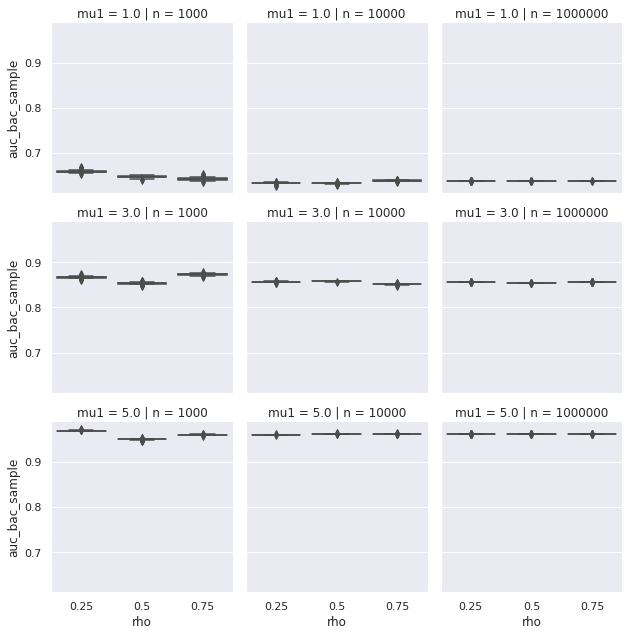

In [324]:
g = sns.FacetGrid(s_done, col="n", row="mu1") #, hue="sampling_ratio")
#g = (g.map(sns.boxplot, "mu1", "auc_bac")).add_legend()
g = g.map(sns.boxplot, "rho", "auc_bac_sample")

/projects/SharedFolder/Software/pyenv/versions/3.6.8/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


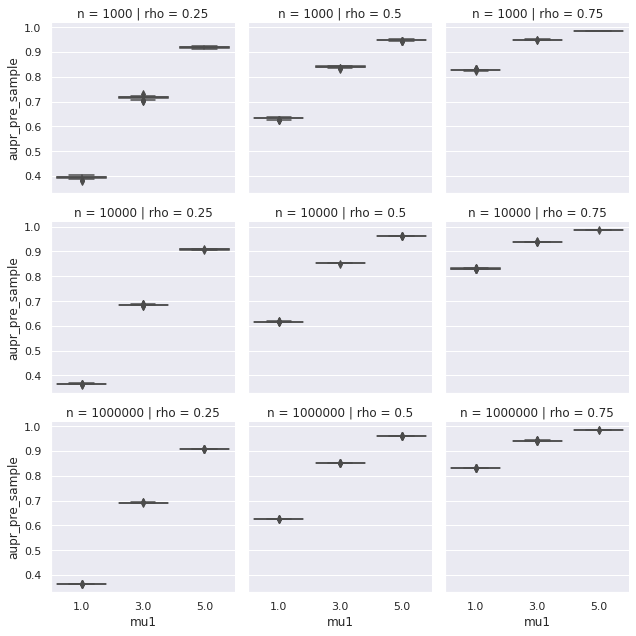

In [325]:
g = sns.FacetGrid(s_done, col="rho", row="n") #, hue="sampling_ratio")
#g = (g.map(sns.boxplot, "mu1", "auc_bac")).add_legend()
g = g.map(sns.boxplot, "mu1", "aupr_pre_sample")